<img src = "../imgs/Banner_Logo.JPEG"/>



# <center> 06. Cross validation and Image classification! </center>


## <span style="color:red"> Outline </span> 
1. **Images classification and recognition**
2. **KNN simple classification**
3. **Cross validation**

## A complex problem !

### Labradoodle or fried chicken ?  
<img src="../imgs/complex1.png" style="width:500px;heigth:100px">

### Sheepdog or mop ?
<img src="../imgs/complex3.png" style="width:500px;heigth:100px">

### Chihuahua or muffin ?

<img src="../imgs/complex4.png" style="width:500px;heigth:100px">


In [1]:
import cv2 as cv
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [2]:
from keras.datasets import mnist
((trainX, trainY), (testX, testY)) = mnist.load_data()
number_to_class_dict = {0:"Cero" , 1:"Uno" , 2:"Dos" ,3:"Trés" ,4:"Cuatro" ,5:"Cinco",
                        6: "Seis", 7: "Siete", 8: "Ocho", 9: "Nueve" }

Using TensorFlow backend.


## <span style="color:red"> 1. Images classification and recognition </span> 

The classification is the problem of predicting a discrete class label output for an example.

**Function Approximation:** The idea is  developing a model using historical data to make a prediction on new data where we do not have the answer. This is done by approximating a function:    

$$\hat{f}: x(t) \to y(t)$$

$x(t) = \left \{ x_1, x_2, \ldots x_n  \right \}$ is input data, while $y(t) = \left \{0,1,2, ... , c \right \}$ is output data. For classification, $y(t)$ are discrete output variables.



Charge the MNIST dataset which includes 10 different numbers!
[1 MNIST](http://yann.lecun.com/exdb/mnist/)

#### Looks simple ...and we have many features: shape, geometry, among others!

In [3]:
print("There is a total of {} samples in our dataset.".format(len(trainY)))
n_classes = 10
for i in range (n_classes):
    class_name = number_to_class_dict[i]
    number_of_samples = len(trainY[trainY == i])
    print("Class: {}-{} has {} number of samples.".format(i,class_name,number_of_samples))

There is a total of 60000 samples in our dataset.
Class: 0-Cero has 5923 number of samples.
Class: 1-Uno has 6742 number of samples.
Class: 2-Dos has 5958 number of samples.
Class: 3-Trés has 6131 number of samples.
Class: 4-Cuatro has 5842 number of samples.
Class: 5-Cinco has 5421 number of samples.
Class: 6-Seis has 5918 number of samples.
Class: 7-Siete has 6265 number of samples.
Class: 8-Ocho has 5851 number of samples.
Class: 9-Nueve has 5949 number of samples.


### Visualize
Now we going to select and visualize  random image subsets to dimension the problem! 

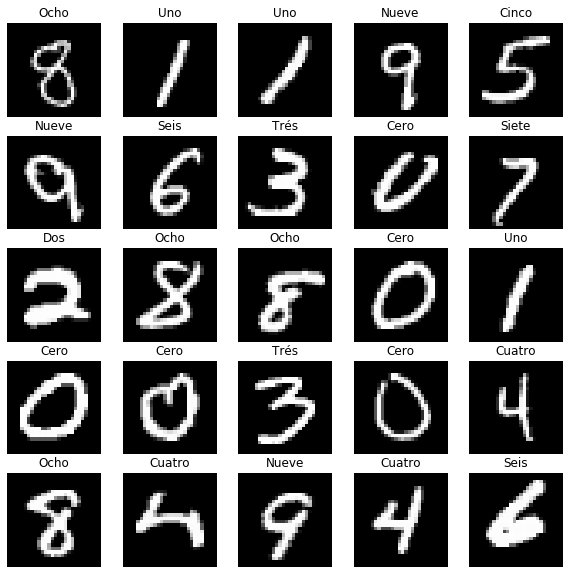

In [4]:
rows = 5
cols = 5
Nsamples = rows*cols
sample_indexes = np.random.randint(low=0 , high= len(trainX), size = Nsamples)
plt.figure(figsize=(10,10))

for i in range (Nsamples):
    plt.subplot(rows,cols,(i+1))
    index = sample_indexes[i]
    image_i = trainX[index]
    class_i = trainY[index]
    plt.axis('off')
    plt.imshow(image_i, cmap='gray')
    plt.title(number_to_class_dict[class_i])
    

## <span style="color:red"> 2. KNN simple classificaion </span> 

It is one of the simplest of classification algorithms available for supervised learning. The idea is to search for closest match of the test data in feature space. 

<img src="../imgs/classification_1.png" style="width:500px;heigth:100px">

### The main steps of the KNN algorithm

1. Calculate the distance between the new point and every other point
    - Sort the distances
2. Pick K minimum distances from the list of sorted distances
3. Use majority voting to get the color of the point

<img src="../imgs/classification_2.png" style="width:800px;heigth:100px">

[2 KNN](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)

#### Go to the actions!

Firstly check the shape of your train and test folds.

In [5]:
print(trainX.shape)
print(trainY.shape)
train_samples, width, height = trainX.shape

(60000, 28, 28)
(60000,)


In [6]:
print(testX.shape)
print(testY.shape)
print(testY[:10])
print([number_to_class_dict[i] for i in testY[:10]])

(10000, 28, 28)
(10000,)
[7 2 1 0 4 1 4 9 5 9]
['Siete', 'Dos', 'Uno', 'Cero', 'Cuatro', 'Uno', 'Cuatro', 'Nueve', 'Cinco', 'Nueve']


In [7]:
train_samples = 10000
test_samples = 2000
trainX_flatten = np.reshape(trainX, newshape=(len(trainX),width*height))
testX_flatten = np.reshape(testX, newshape=(len(testX),width*height))
trainX_flatten = trainX_flatten[:train_samples]
trainY = trainY[:train_samples]
testX_flatten = testX_flatten[: test_samples]
testY = testY[:test_samples]
print(trainX_flatten.shape)
print(testX_flatten.shape)

(10000, 784)
(2000, 784)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(trainX_flatten, trainY)
accuracy_train = model.score(trainX_flatten,trainY)
accuracy_test = model.score(testX_flatten, testY)
print("The accuracy on training is : {:.4f}%".format(accuracy_train*100))
print("The accuracy on testing is : {:.4f}%".format(accuracy_test*100))

The accuracy on training is : 96.6900%
The accuracy on testing is : 92.0500%


Very important to understand results!

In [9]:
from sklearn.metrics import confusion_matrix
train_prediction = model.predict(trainX_flatten)
test_prediction = model.predict(testX_flatten)

cm_train=confusion_matrix(trainY, train_prediction)
cm_test = confusion_matrix(testY, test_prediction)
("=====================================================================================")
print("Confusion Matrix in training")
print (cm_train)
print("=====================================================================================")
print("Confusion Matrix in testing")
print (cm_test)


Confusion Matrix in training
[[ 997    1    0    0    0    0    3    0    0    0]
 [   0 1120    2    0    0    0    0    3    1    1]
 [   2   22  948    4    0    1    2    9    1    2]
 [   2    5    6  988    0    9    2   10    3    7]
 [   0   15    0    0  933    0    5    1    0   26]
 [   3    3    0   10    4  831    6    0    1    5]
 [   6    4    0    0    0    5  999    0    0    0]
 [   1   13    2    0    3    0    0 1045    0    6]
 [   2   19    5   14    2   16   10    6  865    5]
 [   5    3    2    8    8    0    1    7    1  943]]
Confusion Matrix in testing
[[174   0   0   0   0   0   1   0   0   0]
 [  0 234   0   0   0   0   0   0   0   0]
 [  5   6 194   0   0   0   3   8   3   0]
 [  0   1   0 190   0   4   2   4   3   3]
 [  0   3   0   0 199   0   3   0   0  12]
 [  1   1   0   7   2 165   1   1   0   1]
 [  4   1   0   0   2   1 170   0   0   0]
 [  0  13   0   1   2   1   0 183   0   5]
 [  3   3   2  10   2   6   3   3 155   5]
 [  1   0   0   4   5   0

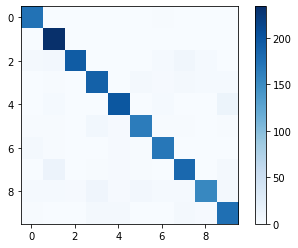

In [10]:
plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

## <span style="color:orange"> Questions for the student </span>: 
At this time, we have a good result in testing...

But,a lot of questions start rounding us:



- What if our test data was easy?
- What if our hard samples were in train and we just skipped them?
- Is my model really stable?
- Is my model learning general features or are we overfitting?

- Would you choose this one as your final model?
- Why?

<img src="../imgs/cross_validation_joke.jpg" style="width:500px;heigth:100px">

## <span style="color:red"> 3. Cross Validation </span>

<img src="../imgs/cross_validation.png" style="width:500px;heigth:100px">

Cross validation is an important technique to evaluate statistically how well or how bad our model is classifying independent of our dataset.

Instead of 1 single result we can get K different results!

[3 Kfold cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

Fold # 1 : Score: 0.9376
[[60  0  0  0  0  0  0  0  0  0]
 [ 0 81  0  0  0  0  0  1  0  0]
 [ 0  5 55  0  0  1  1  3  0  0]
 [ 0  0  0 59  0  0  0  1  0  0]
 [ 0  2  0  0 58  0  0  0  0  2]
 [ 0  1  0  4  0 47  0  0  1  2]
 [ 1  0  0  0  0  0 55  0  0  0]
 [ 0  2  0  0  0  0  0 62  0  2]
 [ 0  1  0  2  0  2  0  0 46  0]
 [ 1  0  0  1  1  0  0  2  0 63]]
Fold # 2 : Score: 0.9232
[[57  0  0  1  0  0  0  0  0  0]
 [ 0 67  0  0  0  0  0  0  0  0]
 [ 1  1 52  1  0  0  0  2  0  0]
 [ 0  0  1 52  0  2  1  0  1  1]
 [ 0  2  1  0 66  0  3  0  0  2]
 [ 0  1  1  2  0 48  1  0  0  0]
 [ 1  1  0  0  0  0 57  0  0  0]
 [ 1  2  1  0  1  2  0 76  0  0]
 [ 1  3  0  2  0  1  0  0 52  2]
 [ 1  0  1  0  1  0  0  2  0 50]]
Fold # 3 : Score: 0.9552
[[58  1  0  0  0  0  0  0  0  0]
 [ 0 62  0  0  0  0  0  0  0  0]
 [ 1  3 56  0  0  0  0  1  0  0]
 [ 0  1  0 61  0  0  0  0  0  0]
 [ 0  7  0  0 59  0  0  0  0  1]
 [ 1  0  0  0  1 58  0  0  0  0]
 [ 0  0  0  0  0  1 68  0  0  0]
 [ 0  0  0  0  0  1  0 63  0  0]

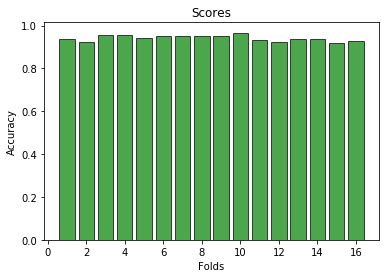

In [11]:
def perform_cross_validation(k=16):
    from sklearn.model_selection import KFold
    scores = []
    model = KNeighborsClassifier(n_neighbors=5)
    kfold = KFold(n_splits=k)
    data = trainX_flatten
    labels = trainY
    i = 0
    for train, test in kfold.split(data, trainY):
        i = i + 1
        model.fit(data[train], labels[train])
        score_i = model.score(data[test], labels[test])
        scores.append(score_i)
        cm_fold=confusion_matrix(labels[test], model.predict(data[test]))
        print("====================================================================")
        print("Fold # {} : Score: {}".format(i,score_i))
        print(cm_fold)
        print("====================================================================")
    
    split_numbers = np.linspace(start=1, stop=k , num=k)
    score_bar = plt.bar(split_numbers,scores,  alpha=0.7, edgecolor='k', width=0.8, color="green")
    plt.title("Scores")
    plt.xlabel("Folds")
    plt.ylabel("Accuracy")
    print("Accuracy in validation: {:.4f}%".format(np.mean(scores)*100))
    print("Standard deviation: {:.4f}%".format(np.std(scores)*100))
        
        
perform_cross_validation(16)

## Test

In [17]:
model = KNeighborsClassifier(n_neighbors=5)
((trainX, trainY), (testX, testY)) = mnist.load_data()
trainX_flatten = trainX.reshape((len(trainX),28*28))
testX_flatten = testX.reshape((len(testX),28*28))
model.fit(trainX_flatten, trainY)
test_prediction = model.predict(testX_flatten)
cm_test = confusion_matrix(testY, test_prediction)
print("=====================================================================================")
print("Confusion Matrix in testing")
print (cm_test)
print("=====================================================================================")

print("Accuracy in test: {:.4f}%".format(model.score(testX_flatten,testY)*100))

Confusion Matrix in testing
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  991    2    1    0    1   15    3    0]
 [   0    3    3  976    1   13    1    6    3    4]
 [   3    7    0    0  944    0    4    2    1   21]
 [   5    0    0   12    2  862    4    1    2    4]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   22    4    0    3    0    0  988    0   11]
 [   8    3    5   13    6   12    5    5  913    4]
 [   5    7    3    9    7    3    1   10    2  962]]
Accuracy in test: 96.8800%


## <span style="color:orange"> Student challenge</span>:
+ 1) Reproduce the same experiment but, try with a different number of folds
+ 2) Variate the number of neighbors of your KNN!
+ 3) Try with a different classifier such as: GaussianNB, DecisionTree, RandomForest or SVM.

# References

 + [1 Mnist](http://yann.lecun.com/exdb/mnist/)
 + [2 KNN](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)
 + [3 Kfold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)
 

<img src="../imgs/bannerThanks.jpg" style="width:1000px;">